# Porównanie wyników pomiarów wydajności QuadTree and KDTree

In [1]:
# Import data libraries and timers
import pandas as pd
from time import process_time
# Imports geometry utilities
from utilities.Point import Point
from utilities.Rectangle import Rectangle
# Imports modules for testing, benchmarking and visualizing
from visualizer.main import Visualizer
from comparator.CaseGenerator import CaseGenerator
from TestManager import TestManager
# Imports data structures (and their visualizers)
from KdTree import KdTree, KdTree_visualizer
from QuadTree import QuadTree, QuadTree_visualizer

## Spis treści:
1. Sprawdzenie poprawności działania porównywanych struktur danych
2. Pomiary wydajności dla różnych rozmiarów danych oraz rodzaju danych wejściowych
3. Generowanie wykresów
4. Pomiary dla indywidulanych przypadków pod zastosowania drzewa

## 1. Sprawdzenie poprawności działania porównywanych struktur danych

KdTree:

In [2]:
KdTree_tests = TestManager(KdTree).all_tests()

Running all tests:
Test contain_point_int:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Passed 57/57 tests.
Test contain_point_float:
++++++++++
Passed 10/10 tests.
Test points_in_rectangle_int:
++++
Passed 4/4 tests.
Test points_in_rectangle_float:
+
Passed 1/1 tests.
Passed 72/72 of all tests.


QuadTree:

In [5]:
QuadTree_tests = TestManager(QuadTree).all_tests()

Running all tests:
Test contain_point_int:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Passed 57/57 tests.
Test contain_point_float:
++++++++++
Passed 10/10 tests.
Test points_in_rectangle_int:
++++
Passed 4/4 tests.
Test points_in_rectangle_float:
+
Passed 1/1 tests.
Passed 72/72 of all self tests.
Running all unittests:


Weryfikacja:

In [6]:
assert KdTree_tests and QuadTree_tests
print("All tests passed!")

All tests passed!


## 2. Pomiary wydajności

In [30]:
cg = CaseGenerator()
def benchmark(func, quantities, rectangle = Rectangle(Point([0,0]), Point([100,100]))):
    data = []
    for q in quantities:
        points = func(q, rectangle)
        t1 = process_time()
        KdTree(points)
        t2 = process_time()
        QuadTree(points)
        t3 = process_time()
        if isinstance(q, list):
            q = q[0]+q[1]
        elif isinstance(q, tuple):
            q = q[0]*q[1]
        data.append((q, t2-t1, t3-t2, abs(t2-t1-t3+t2)))
    col = ["Liczba punktów", "KdTree [s]", "QuadTree [s]", "różnica [s]"]
    return pd.DataFrame(data, columns=col, index=[_ for _ in range(1,len(quantities)+1)])

2.1 Rozkład równomierny

In [37]:
#construction time
# , search time, rectangle search time ???
# ...
q1 = [100, 200, 500, 1000, 1500, 2000, 3000, 5000, 7500, 10000]
df1 = benchmark(cg.uniform_distribution, q1)
df1

,Liczba punktów,KdTree [s],QuadTree [s],różnica [s]
1,100,0.000000,0.000000,0.000000
2,200,0.000000,0.000000,0.000000
3,500,0.000000,0.031250,0.031250
4,1000,0.015625,0.015625,0.000000
5,1500,0.000000,0.000000,0.000000
6,2000,0.031250,0.031250,0.000000
7,3000,0.015625,0.031250,0.015625
8,5000,0.031250,0.093750,0.062500
9,7500,0.046875,0.171875,0.125000
10,10000,0.046875,0.125000,0.078125


2.2 Rozkład normalny

In [38]:
df2 = benchmark(cg.normal_distribution, q1)
df2

,Liczba punktów,KdTree [s],QuadTree [s],różnica [s]
1,100,0.000000,0.000000,0.000000
2,200,0.015625,0.015625,0.000000
3,500,0.015625,0.015625,0.000000
4,1000,0.000000,0.031250,0.031250
5,1500,0.031250,0.000000,0.031250
6,2000,0.015625,0.015625,0.000000
7,3000,0.000000,0.000000,0.000000
8,5000,0.015625,0.140625,0.125000
9,7500,0.062500,0.296875,0.234375
10,10000,0.125000,0.250000,0.125000


2.3 Rozkład "posadzka"

In [14]:
q2 = [(10,10),(15,15),(20,20),(25,25),(30,30),(40,40),(50,50),(75,75),(85,85),(100,100)]
df3 = benchmark(cg.grid_distribution, q2)
df3

,Liczba punktów,KdTree [s],QuadTree [s],różnica [s]
1,100,0.000000,0.000000,0.000000
2,225,0.000000,0.015625,0.015625
3,400,0.000000,0.015625,0.015625
4,625,0.046875,0.000000,0.046875
5,900,0.000000,0.015625,0.015625
6,1600,0.015625,0.015625,0.000000
7,2500,0.015625,0.015625,0.000000
8,5625,0.046875,0.062500,0.015625
9,7225,0.046875,0.093750,0.046875
10,10000,0.062500,0.125000,0.062500


2.4 Rozkład klastrowy

In [16]:
c = (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30])))
df4 = benchmark(cg.cluster_distribution,q1, c)
df4

,Liczba punktów,KdTree [s],QuadTree [s],różnica [s]
1,100,0.000000,0.015625,0.015625
2,200,0.062500,0.046875,0.015625
3,500,0.015625,0.031250,0.015625
4,1000,0.015625,0.046875,0.031250
5,1500,0.078125,0.062500,0.015625
6,2000,0.062500,0.062500,0.000000
7,3000,0.062500,0.234375,0.171875
8,5000,0.125000,0.328125,0.203125
9,7500,0.187500,0.609375,0.421875
10,10000,0.234375,0.828125,0.593750


2.5 Rozkład krzyżowy

In [31]:
cross = Rectangle(Point([0,0]), Point([1000,1000]))
q3 = [[50,50],[100,100],[250,250],[500,500],[750,750],[1000,1000],[1500,1500],[2500,2500],[3750,3750],[5000,5000]]
df5 = benchmark(cg.cross_distribution, q3, cross)
df5

,Liczba punktów,KdTree [s],QuadTree [s],różnica [s]
1,100,0.000000,0.000000,0.000000
2,200,0.000000,0.015625,0.015625
3,500,0.000000,0.000000,0.000000
4,1000,0.000000,0.000000,0.000000
5,1500,0.000000,0.031250,0.031250
6,2000,0.031250,0.093750,0.062500
7,3000,0.015625,0.046875,0.031250
8,5000,0.031250,0.109375,0.078125
9,7500,0.046875,0.156250,0.109375
10,10000,0.078125,0.281250,0.203125


2.6 Rozkład prostokątny

In [32]:
df6 = benchmark(cg.normal_distribution, q1)
df6

,Liczba punktów,KdTree [s],QuadTree [s],różnica [s]
1,100,0.000000,0.000000,0.000000
2,200,0.015625,0.000000,0.015625
3,500,0.031250,0.000000,0.031250
4,1000,0.000000,0.000000,0.000000
5,1500,0.000000,0.031250,0.031250
6,2000,0.031250,0.046875,0.015625
7,3000,0.015625,0.031250,0.015625
8,5000,0.000000,0.109375,0.109375
9,7500,0.093750,0.093750,0.000000
10,10000,0.109375,0.265625,0.156250


## 3. Generowanie wykresów

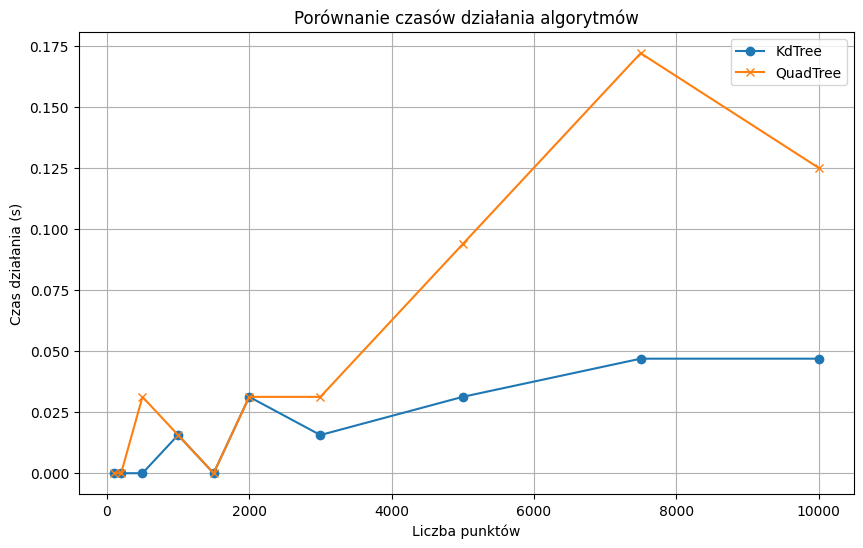

In [39]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(df2['Liczba punktów'], df1['KdTree [s]'], label='KdTree', marker='o')
plt.plot(df2['Liczba punktów'], df1['QuadTree [s]'], label='QuadTree', marker='x')

plt.title('Porównanie czasów działania algorytmów')
plt.xlabel('Liczba punktów')
plt.ylabel('Czas działania (s)')
plt.legend()
plt.grid(True)
plt.show()